In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import least_squares

In [31]:
100/4096

0.0244140625

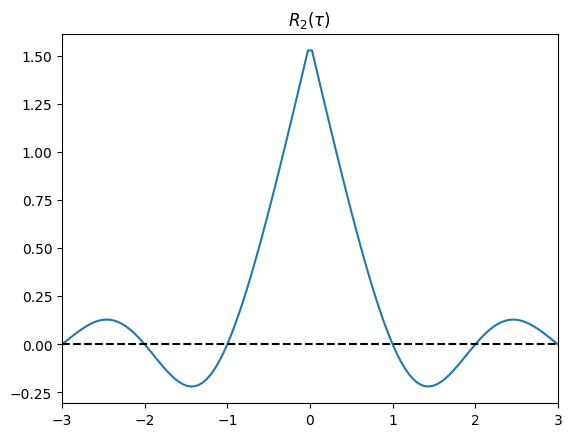

In [59]:
x = np.linspace(-100,100,4096)
# y =  (1-np.abs(x))*0.7 + 0.3*np.sinc(x)
# y = np.abs(1/x)
y = np.arcsin(np.sinc(x))

a=1
b=0.1/0.01
w=0.1/np.sqrt(0.01)
y3 = 1/(b*x**2+w**2) + np.sinc(x)
k=5.5
r=2
# yy =np.exp(k*(x-r))/(np.exp(k*(x-r))+1) + np.exp(-k*(x+r))/(np.exp(-k*(x+r))+1)

# plt.plot(x,y3 )
f=plt.gcf()
f.set_facecolor('white')
plt.title(r"$R_2(\tau)$")
plt.plot(x,y)
plt.xlim(-3,3)
# plt.axvline(1)
plt.axhline(0,c='black',ls='--')

In [53]:
np.where(np.abs(np.abs(x)-1)<1e-2)

(array([2027, 2068]),)

In [56]:
4096/41

99.90243902439025

In [3]:
def xcorr(params,x,y):
    ypred = 1/(params[0]*x**2 + params[1]**2) + np.sinc(x)
    return y - ypred

def get_res(params,x,y):
    return y - func(x)

In [4]:
params=least_squares(xcorr, (b,w), args=(x,y),gtol=1e-14,ftol=1e-14)['x']

In [5]:
params

array([52.91677105,  1.36727073])

In [6]:
ypred = 1/(params[0]*x**2 + params[1]**2) + np.sinc(x)

(-10.0, 10.0)

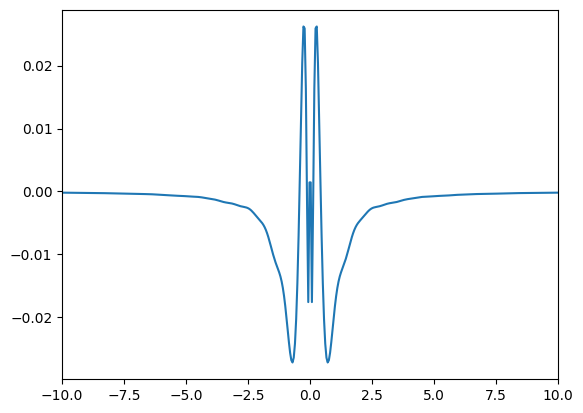

In [7]:
plt.plot(x, y-ypred)
# plt.plot(x, y)
plt.xlim(-10,10)

In [16]:
plt.plot(np.arcsin(np.linspace(-1,1)))

0.2013579207903308

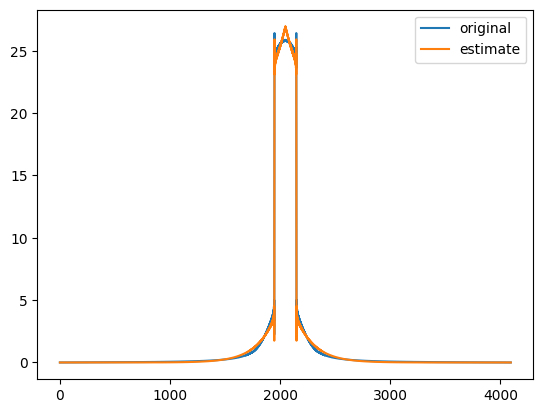

In [61]:
yf = np.fft.fft(y)
yf2 = np.fft.fft(ypred)
plt.plot(np.fft.fftshift(np.abs(yf)),label='original')
plt.plot(np.fft.fftshift(np.abs(yf2)), label='estimate')
d=4096//2
# plt.xlim(d-102,d+102)
plt.legend()

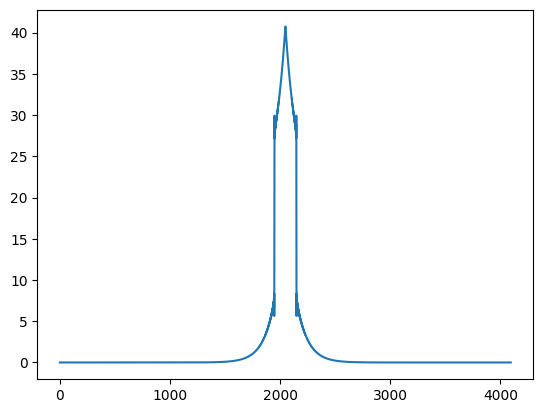

In [37]:
yf = np.fft.fft(y3)
plt.plot(np.fft.fftshift(np.abs(yf)))
d=4096//2
# plt.xlim(d-100,d+10)